# Loading Modules and Data

In [1]:
# Bringing in Essential Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

# Configuring the environment to suppress future warnings
import warnings
warnings.filterwarnings('ignore')

# Setting the default figure dimensions for Exploratory Data Analysis
import matplotlib.pylab as pylab
pylab.rcParams["figure.figsize"] = (14, 7)

# Adjusting the default settings of pandas for better display
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [11]:
# Reading file
bank_data = pd.read_csv("bank-additional-full.csv",sep = ";")

# Renaming the column 'y' to 'target'
bank_data.rename(columns={"y": "target"},inplace = True)
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Exploratory Data Analysis

In [4]:
# Function to execute a comprehensive Exploratory Data Analysis (EDA)
def execute_eda(df, data_name=""):
    # Displaying basic information about the data such as name, size, and shape
    print(f"Performing EDA on {data_name} Data....")
    print(f"Size: {df.size}")
    print(f"Columns: {df.shape[1]}")
    print(f"Records: {df.shape[0]}")
    print("="*50)

    # Separating the numerical and categorical columns
    categorical_cols = df.select_dtypes("O").columns
    numerical_cols = df.select_dtypes(np.number).columns

    # Displaying the numerical columns
    print("The dataset includes the following numerical columns...")
    for i, j in enumerate(numerical_cols):
        print(f" {i+1}) {j}")

    # Displaying the categorical columns
    print("\n\nThe dataset includes the following categorical columns...")
    for i, j in enumerate(categorical_cols):
        print(f" {i+1}) {j}")

    # Displaying information about the data such as data type and non-null values
    print("="*50)
    print("Data Information....")
    print(df.info())
    print("="*50)

    # Displaying statistical properties of the data such as mean, median, max, and min
    print("Statistical Properties of Data....")
    display(df.describe(include="all"))
    print("="*50)

In [5]:
execute_eda(bank_data, "Bank")

Performing EDA on Bank Data....
Size: 823760
Columns: 20
Records: 41188
The dataset includes the following numerical columns...
 1) age
 2) campaign
 3) pdays
 4) previous
 5) emp.var.rate
 6) cons.price.idx
 7) cons.conf.idx
 8) euribor3m
 9) nr.employed


The dataset includes the following categorical columns...
 1) job
 2) marital
 3) education
 4) default
 5) housing
 6) loan
 7) contact
 8) month
 9) day_of_week
 10) poutcome
 11) target
Data Information....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact      

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


### Univariate Analysis

In [5]:
# Percentage on bar
def per_on_bar(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

In [6]:
def make_plots(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    plt.show()

Total unique values are:  12 


Category	Value

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


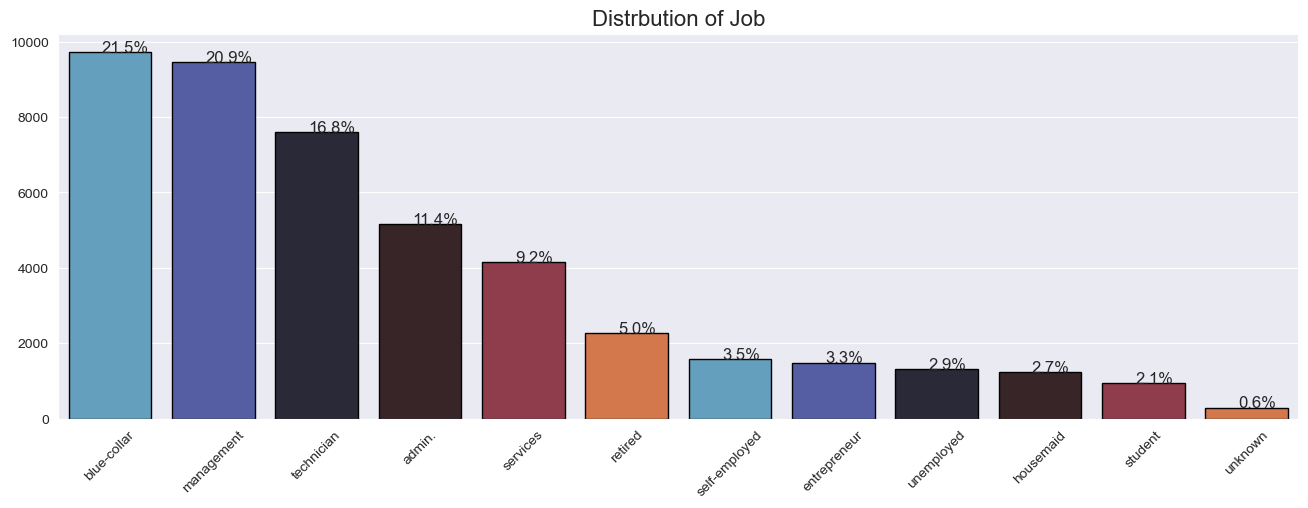

In [7]:
per_on_bar(bank_data.job, "Distrbution of Job")

Most of the people were having Job Title **Management, Blue-Collar**.

Total unique values are:  3 


Category	Value

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


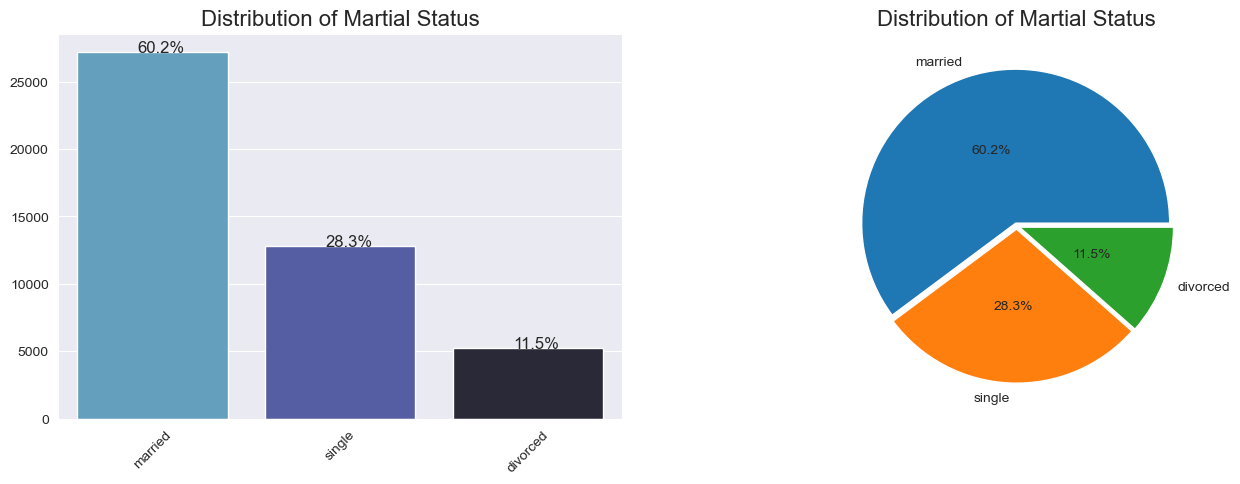

In [8]:
make_plots(bank_data.marital, "Distribution of Martial Status")

Most of them were **Married**.

Total unique values are:  4 


Category	Value

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


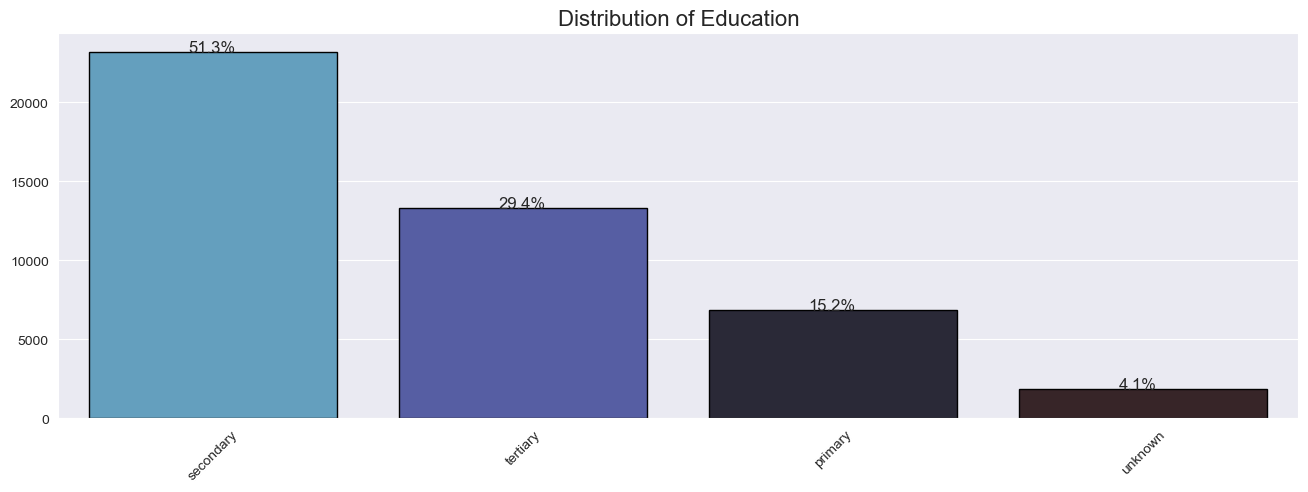

In [9]:
per_on_bar(bank_data.education, "Distribution of Education")

Most of the People were **Secondary Educated**.

Total unique values are:  2 


Category	Value

no     44396
yes      815
Name: default, dtype: int64


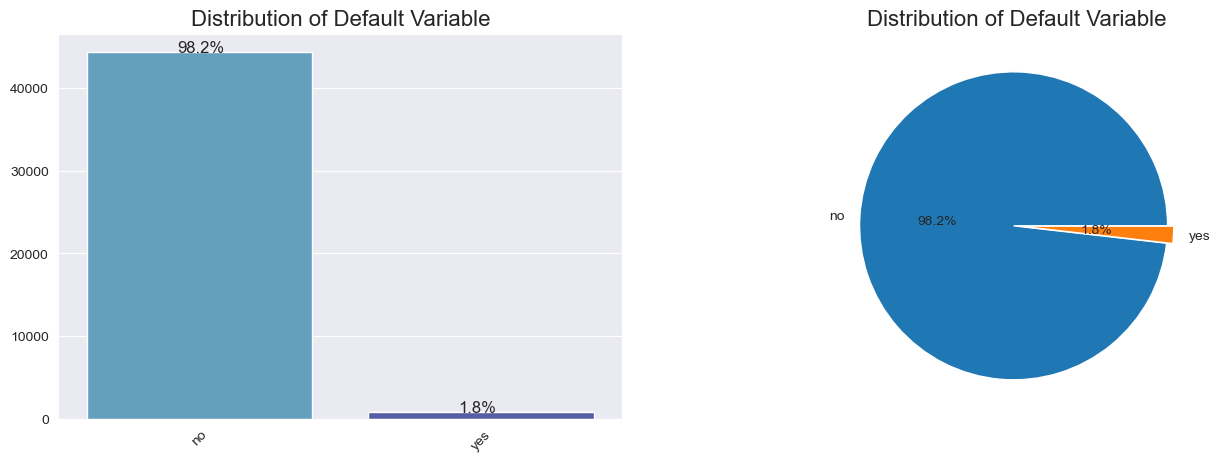

In [10]:
make_plots(bank_data.default, "Distribution of Default Variable")

Only 2% people were default

Total unique values are:  2 


Category	Value

yes    25130
no     20081
Name: housing, dtype: int64


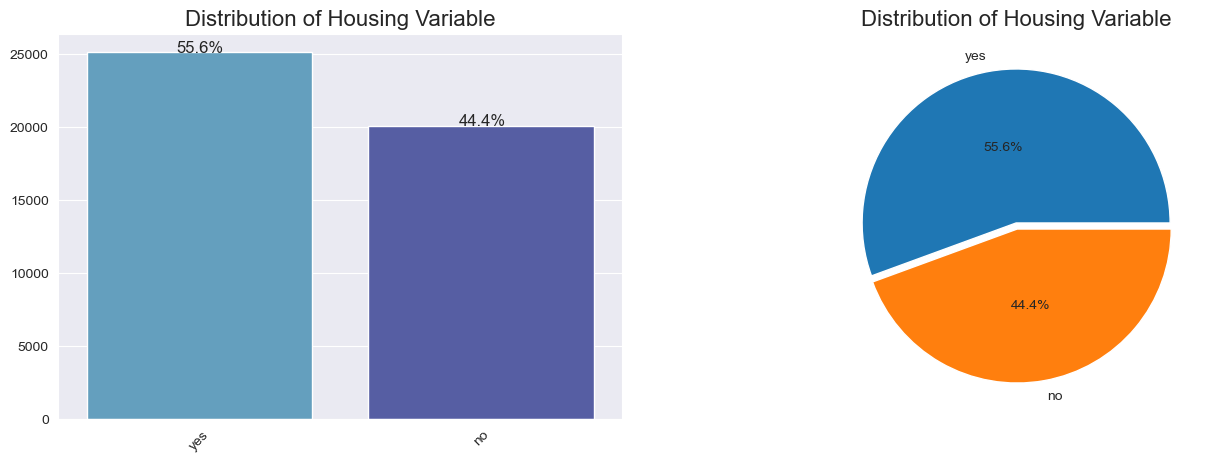

In [11]:
make_plots(bank_data.housing, "Distribution of Housing Variable")

Mostly people who applied for Loan were having **house.**

Total unique values are:  2 


Category	Value

no     39922
yes     5289
Name: target, dtype: int64


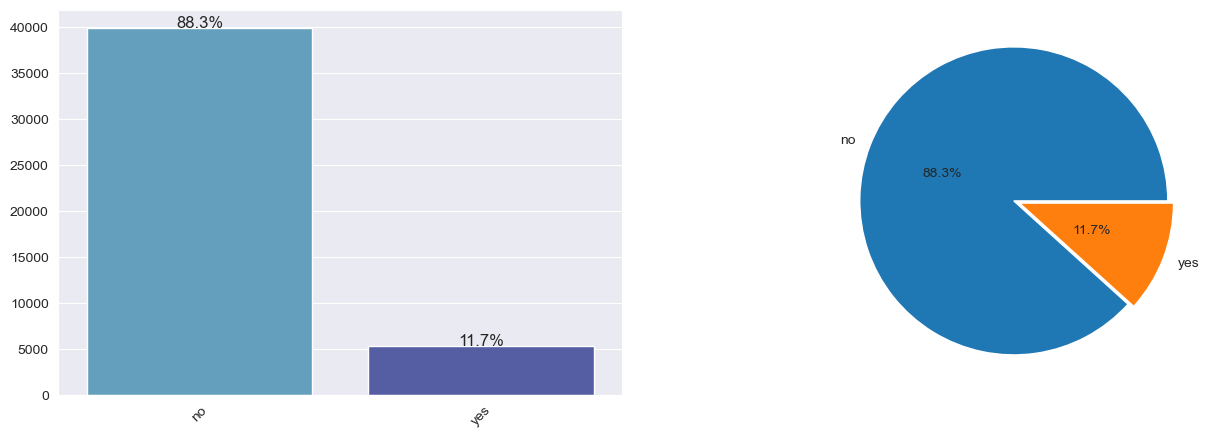

In [12]:
make_plots(bank_data.target)

This is our target feature that we have to use for prediction, but there is a problem that data is imbalanced between 2 classes. So before using it for our model we have to make it balanced.

In [13]:
# Function to make plots for numerical feature
def make_numerical_plots(feature):
    # Setting figure size
    plt.figure(figsize=(15, 5))
    
    # Making KDE plot
    plt.subplot(121)
    sns.kdeplot(feature)
    
    # Making boxen plot
    plt.subplot(122)
    sns.boxenplot(feature)
    plt.show()

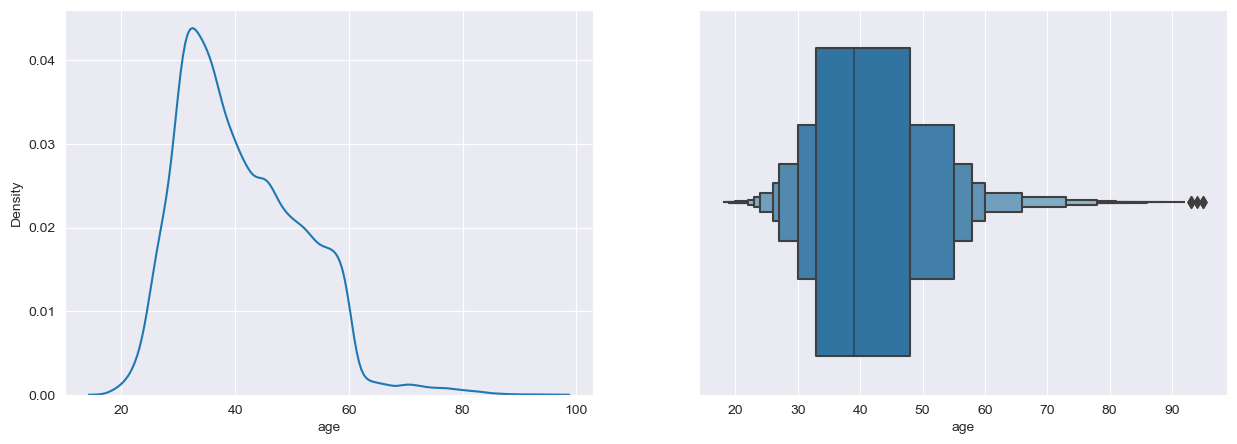

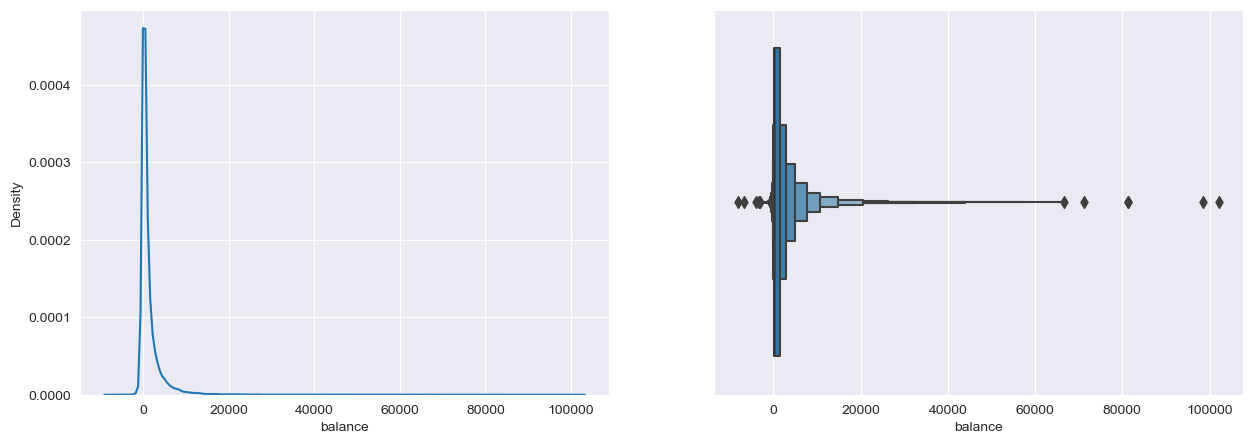

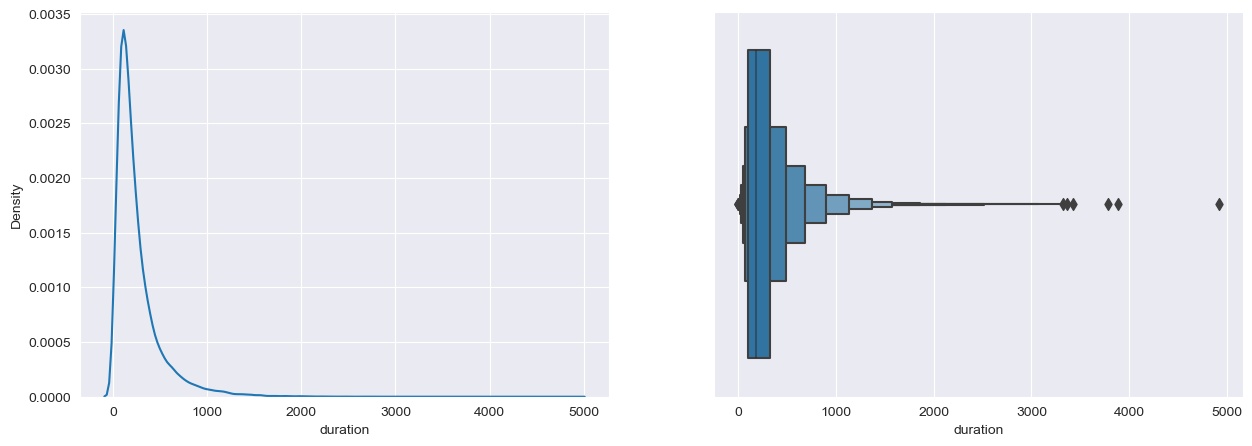

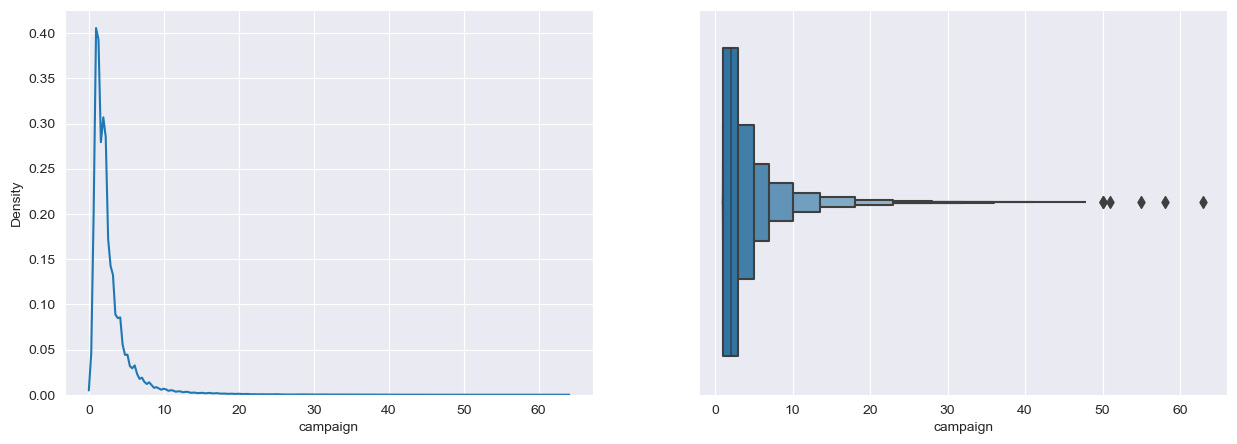

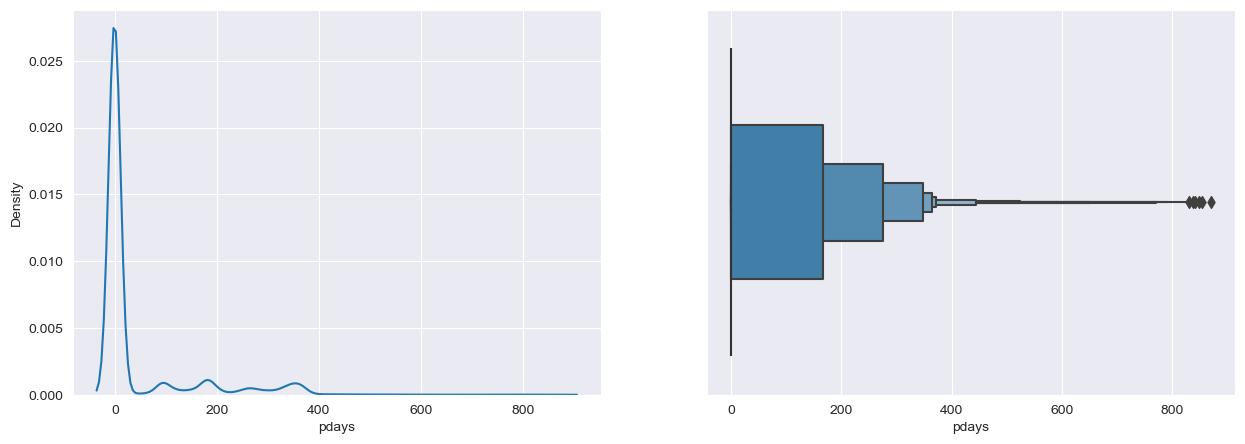

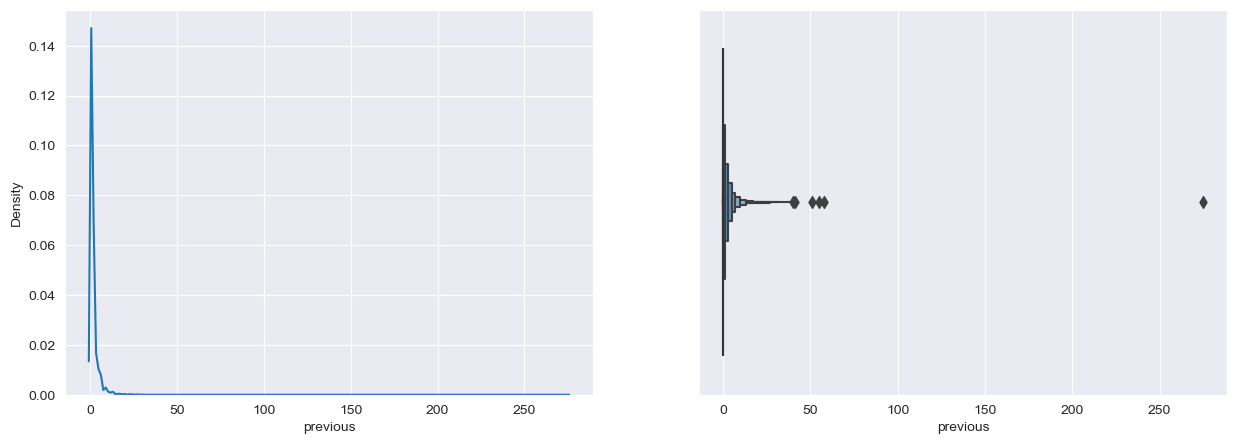

In [14]:
# PLoting numerical features
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in num_cols:
    make_numerical_plots(bank_data[col])